1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from math import sqrt, pi, erf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, fftpack
from scipy.integrate import quad, quadrature, nquad, odeint

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigmaPre = np.sqrt(np.var(pre, ddof=1))
sigmaPost = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigmaPre**2+sigmaPost**2)/2)
nDof = len(pre)-1

preMean = np.mean(pre)
postMean = np.mean(post)
print(preMean,postMean)

T = (preMean - postMean) / (sigma / np.sqrt(len(pre)))
print (T)

pvalue = stats.t.cdf(T, nDof) + (1. - stats.t.cdf(-T, nDof))
print(pvalue)

116.7 135.4
-5.355623844793182
0.00045894515934558235


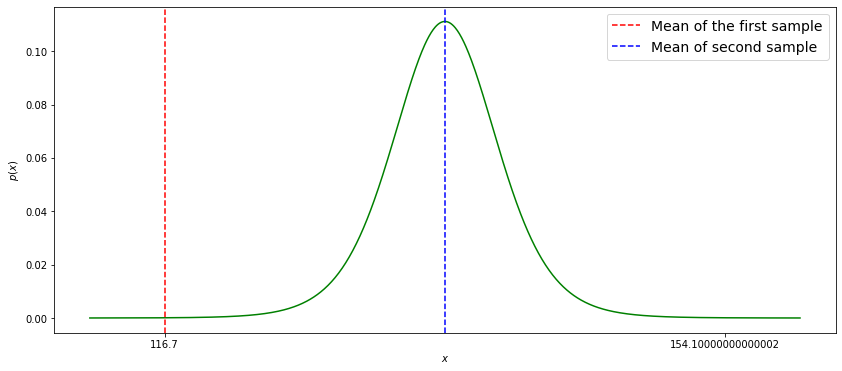

In [6]:
fig = plt.figure(figsize=(14,6))
w = postMean - preMean

x = np.linspace(postMean - w - 5, postMean + w + 5, 1000)
y = stats.t.pdf(x, loc=postMean, scale=sigma / np.sqrt(len(pre)), df=nDof)

#plotting
plt.plot(x, y, color = 'g')
plt.axvline(preMean, linestyle='--', color='red', label = 'Mean of the first sample')
plt.axvline(postMean, linestyle='--', color='b', label = 'Mean of second sample')
plt.xticks([postMean - w, postMean + w], [postMean - w, postMean + w])

plt.ylabel("$p(x)$")
plt.xlabel("$x$")

plt.legend(loc = 'best', fontsize = 14)
plt.show()

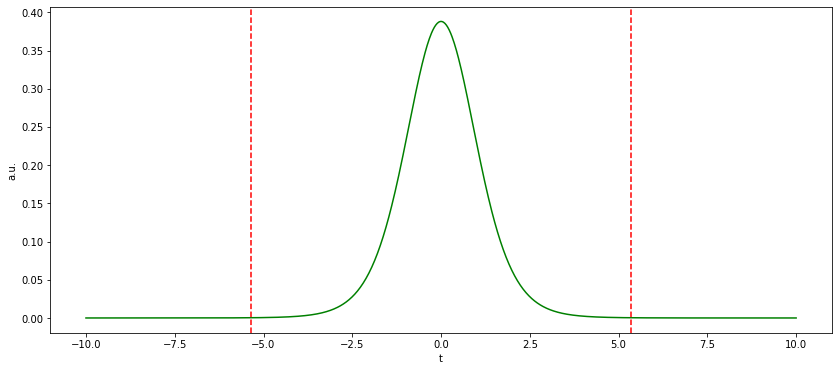

In [12]:
# plot the test statistics and its pdf
fig = plt.figure(figsize=(14,6))
xs = np.linspace(-10, +10, 1000)
ts = stats.t.pdf(xs, nDof)
plt.plot(xs, ts, color = 'g' )
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T))
plt.axvline(T, linestyle='dashed', color='r')
plt.axvline(-T, linestyle='dashed', color='r')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [15]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2021-12-17 08:12:25--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/ebe1cnyd2gm836a/populations.txt [segue]
--2021-12-17 08:12:25--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uca996b12a6eda990addbf9ac9f5.dl.dropboxusercontent.com/cd/0/inline/BcCMgdp-lIaaVa6jc1lx2iK2YbYy-JyFJZBk0tUON2I4-54wgnKEM9PboUNxwI8AerRhAGZCYe1-HMd03CzlgGz1ebzUoqUW2CgJZI0cUKgvsQuDFSs2v9mVXt-ixidU_SSk4hpdl9dps6vnP05XwpKV/file# [segue]
--2021-12-17 08:12:25--  https://uca996b12a6eda990addbf9ac9f5.dl.dropboxusercontent.com/cd/0/inline/BcCMgdp-lIaaVa6jc1lx2iK2YbYy-JyFJZBk

In [16]:
!cat ./data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


Text(0, 0.5, '#Individuals')

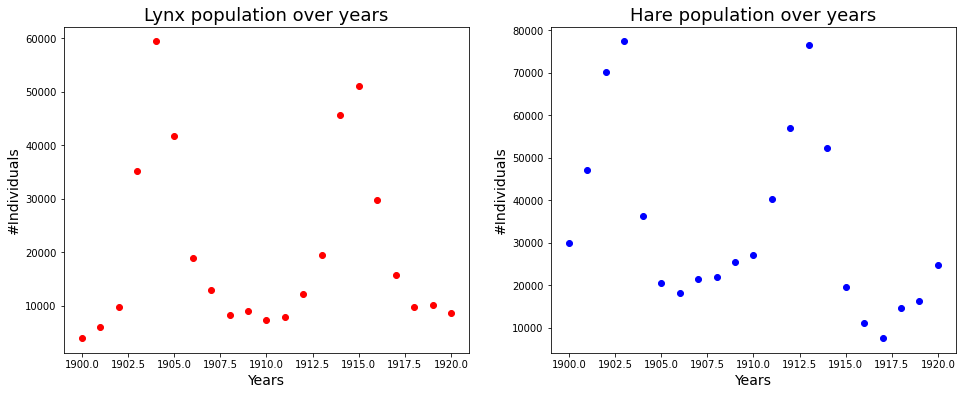

In [17]:
input_file = './data/populations.txt'
data = pd.read_csv('./data/populations.txt', delimiter = '\t')

#let's plot hare vs year and lynx vs year
years = np.array(data['# year'])
lynxPopulation = np.array(data['lynx'])
harePopulation = np.array(data['hare'])

fig, ax = plt.subplots(nrows=1, ncols=2, sharex='row', figsize=(16,6))
ax[0].scatter(years,lynxPopulation, label = 'Lynx population', color ='r')
ax[1].scatter(years,harePopulation, label = 'Hare population', color = 'b')

ax[0].set_title('Lynx population over years', fontsize = 18)
ax[0].set_xlabel('Years', fontsize = 14)
ax[0].set_ylabel('#Individuals', fontsize = 14)

ax[1].set_title('Hare population over years', fontsize = 18)
ax[1].set_xlabel('Years', fontsize = 14)
ax[1].set_ylabel('#Individuals', fontsize = 14)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.